# Projeto de Trainee - Processamento de Linguagem Natural


<img src="https://i.ibb.co/DtHQ3FG/802x265-Logo-GT.png" width="370">


### Ánalise de sentimentos com um dataset de reviews do IMDB.

# Parte 3
Análise com word vectors.

## Preparação

In [1]:
import pandas as pd

In [2]:
#ja tem o dataset pre-processado da pt1
data = pd.read_csv("/content/drive/My Drive/nlp-trainee/imdb_preprocessado.csv")
data.drop('Unnamed: 0',1, inplace=True)

In [3]:
data.head()

,review,sentiment
0,one reviewer mention watch oz episode hook rig...,positive
1,wonderful little production filming technique ...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


In [4]:
# o word2vec recebe como input uma lista de listas de palavras
texto = [linha.split() for linha in data['review']]

Precisamos também detectar bigramas, para diferenciar o contexto de palvras como "new" e "york" do de "New York".

In [5]:
from gensim.models.phrases import Phrases, Phraser

In [6]:
phrases = Phrases(texto, min_count=30)
bigram = Phraser(phrases)

In [7]:
print(bigram["directed by stanley kubrick".split()])

['directed', 'by', 'stanley_kubrick']


In [8]:
reviews = bigram[texto]

## Modelo

In [9]:
import multiprocessing
from gensim.models import Word2Vec

Quanto aos parâmetros que vou especificar:
  - size: dimensão do espaço vetorial. Pelo tamanha do dataset (pouco menos de 50000 datapoints), que não é nem pequeno nem muito grande, **100** é um tamanho razoável.
  - window: distância máxima entre uma palavra target e a vizinha. Vou usar **2**.
  - min_count: contagem mínima que uma palavra precisa aparecer para ser treinada. Como já retiramos stopwords, aqui vou usar **2**.
  - iter: número de iterações ao longo do corpus. Vou usar **10**.

In [10]:
w2v_model = Word2Vec(
        size=100,
        window=2,
        min_count=2,
        iter=10)

In [11]:
from time import time

In [12]:
t = time()

w2v_model.build_vocab(reviews)

print("Tempo para construir o vocabulário: {} mins".format(round((time()-t)/60, 2)))

Tempo para construir o vocabulário: 0.46 mins


### Treinamento

In [13]:
t = time()

w2v_model.train(reviews, total_examples=w2v_model.corpus_count, epochs= 20)

print("Tempo para treinar o modelo: {} mins".format(round((time()-t)/60, 2)))

Tempo para treinar o modelo: 8.71 mins


## Explorando o modelo

### most_similar
Esse método recebe uma palavra e retorna as palavras mais similares a ela de acordo com os contextos em que aparecem.

In [14]:
w2v_model.wv.most_similar(positive = 'cinema')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('art_house', 0.6484930515289307),
 ('film', 0.5962268114089966),
 ('theatre', 0.5555117130279541),
 ('indian_cinema', 0.5510001182556152),
 ('theater', 0.5488426685333252),
 ('new_wave', 0.5428892970085144),
 ('film_maker', 0.5210925340652466),
 ('mainstream', 0.5165697336196899),
 ('arthouse', 0.5127266645431519),
 ('cinematic', 0.5120128989219666)]

Interessante que "art house" tenha aparecido antes de "film" ou "theater", provavelmente "cinema" deve ser mais usada no sentido da arte do que do local físico.

In [15]:
w2v_model.wv.most_similar(positive = 'actress')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('actor', 0.7767589092254639),
 ('actresse', 0.7232663631439209),
 ('actor_actresse', 0.6321505308151245),
 ('lead_actress', 0.5926085710525513),
 ('lead_lady', 0.5719466805458069),
 ('talented_actress', 0.5704814195632935),
 ('performer', 0.5524176359176636),
 ('support_actor', 0.5490182042121887),
 ('talented_actor', 0.5201562643051147),
 ('acting', 0.5040449500083923)]

A palavra mais similar é "actor", o que faz sentido.

In [16]:
w2v_model.wv.most_similar(positive = 'classic')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('masterpiece', 0.5795571208000183),
 ('gem', 0.5778657793998718),
 ('aficionado', 0.5557312965393066),
 ('cult_classic', 0.5527224540710449),
 ('sf', 0.5279184579849243),
 ('instant_classic', 0.5114344358444214),
 ('great', 0.5090019702911377),
 ('definitive', 0.503771185874939),
 ('action_adventure', 0.4919877052307129),
 ('fairytale', 0.4897664785385132)]

A maioria das palavras listadas foram adjetivos comumente usados para falar de filmes considerados clássicos.

In [17]:
w2v_model.wv.most_similar(positive = 'stanley_kubrick')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('kurosawa', 0.6571330428123474),
 ('dario_argento', 0.6367620229721069),
 ('deodato', 0.6260479688644409),
 ('francis_ford', 0.6241748332977295),
 ('martin_scorsese', 0.6014801263809204),
 ('ruggero', 0.6000112295150757),
 ('palma', 0.5988659858703613),
 ('aguirre', 0.5980810523033142),
 ('kubrick', 0.5916144847869873),
 ('yasujiro', 0.5907787084579468)]

In [18]:
w2v_model.wv.most_similar(positive = 'kubrick')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('kurosawa', 0.5962206125259399),
 ('stanley_kubrick', 0.5916144847869873),
 ('scorsese', 0.5788189768791199),
 ('david_lynch', 0.5752684473991394),
 ('alfred_hitchcock', 0.5681232213973999),
 ('fellini', 0.5581387281417847),
 ('spielberg', 0.5556434988975525),
 ('eraserhead', 0.5521746277809143),
 ('bakshi', 0.5509347915649414),
 ('hitchcock', 0.5487680435180664)]

Nesse caso, as palavras mais similares foram nomes de outros grandes diretores. Engraçado que "stanley kubrick" seja mais similar a "kurosawa", por exemplo, do que "kubrick".

In [19]:
w2v_model.wv.most_similar(positive = 'vertigo')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('north_northwest', 0.6700438261032104),
 ('stranger_train', 0.6546993851661682),
 ('alfred_hitchcock', 0.6152864694595337),
 ('hitchcock', 0.5775251388549805),
 ('rosemary_baby', 0.5454843640327454),
 ('se_en', 0.5391840934753418),
 ('cape_fear', 0.5179511308670044),
 ('forbrydelsen', 0.517697811126709),
 ('manxman', 0.5137869715690613),
 ('copycat', 0.5131027698516846)]

As palavras mais similares a "Vertigo" são outros dois filmes do Hitchcock (North by Northwest e Strangers on a train).

In [20]:
w2v_model.wv.most_similar(positive = 'masterpiece')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('masterwork', 0.6525548696517944),
 ('gem', 0.6167367696762085),
 ('classic', 0.5795571804046631),
 ('piece_art', 0.548732578754425),
 ('torture_duckle', 0.5457980632781982),
 ('citizen_kane', 0.5433896780014038),
 ('kurosawa', 0.5330185890197754),
 ('oldboy', 0.530025839805603),
 ('clive_barker', 0.5209450721740723),
 ('cult_classic', 0.5116939544677734)]

Além de adjetivos similares, apareceram os filmes Citizen Kane, 2001: a Space Odyssey e Don't Torture a Duckling, e os cineastas Kurosawa e Fellini.

### similarity
Esse método, por sua vez, retorna o grau de similaridade entre duas palavras.

In [21]:
w2v_model.wv.similarity("thriller", "suspense")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.557366

In [22]:
w2v_model.wv.similarity("thriller", "action")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.5197592

In [23]:
w2v_model.wv.similarity("thriller", "drama")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.594446

O gênero thriller apresenta similaridade maior com drama, seguido de suspense (pra minha surpresa, porque eu esperava que suspense tivesse pontuação maior) e depois ação.

In [24]:
w2v_model.wv.similarity("film_noir", "hitchcock")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.6158156

In [25]:
w2v_model.wv.similarity("drama", "hitchcock")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.14612451

In [26]:
w2v_model.wv.similarity("director", "hitchcock")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.3415832

"Hitchcock" apresenta maior relação com "film_noir" do que com "drama" e até do que com "director".

### doesnt_match
Já esse método recebe uma lista de palavras e retorna a palavra que não pertence à lista.

Vamos ver se o modelo consegue dizer qual dos seguintes filmes não foi dirigido pelo Hitchcock:

In [27]:
w2v_model.wv.doesnt_match(['vertigo', 'psycho', 'obsession', 'north_northwest', 'stranger_train', 'notorius'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'obsession'

Nesse caso, ele acerta. Mas, se adicionarmos o filme "Lifeboat", também do Hitchcock, à lista:



In [28]:
w2v_model.wv.doesnt_match(['vertigo', 'psycho', 'obsession', 'north_northwest', 'stranger_train', 'notorius', 'lifeboat'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'lifeboat'

Ele erra, provavelmente porque esse é um filme menos comentado do diretor, é possível que nem haja menções a ele no nosso dataset.

Agora, se trocarmos Obsession por Cape Fear (que são inspirados em Vertigo e Psicose, respectivamente):

In [29]:
w2v_model.wv.doesnt_match(['vertigo', 'psycho', 'cape_fear', 'north_northwest', 'stranger_train', 'notorius'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'cape_fear'

Ele erra e retorna Psicose, o que é curioso já que esse é o mais popular do Hitchcock.

Vamos ver agora se conseguimos identificar qual desses não é um diretor:

In [30]:
w2v_model.wv.doesnt_match(['stanley_kubrick', 'alfred_hitchcock', 'david_lynch', 'ingmar_bergman', 'anthony_hopkins' ,'akira_kurosawa'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'anthony_hopkins'

Certo. 

### Analogias
Agora, vamos tentar responder perguntas do tipo: que palavra está para 'stranger_train' (strangers on a train), como 'space_odyssey' está para 'kubrick'?

In [31]:
def analogia(x1,x2,y1):
  y2 = w2v_model.wv.most_similar(positive = [y1, x2], negative = [x1])
  return y2

In [32]:
analogia('space_odyssey', 'stanley_kubrick', 'stranger_train')[0][0]

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'alfred_hitchcock'

In [33]:
analogia('star_wars', 'sci_fi', 'vertigo')[0][0]

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'thriller'

## Visualizando os vetores

Podemos fazer isso usando as seguintes bibliotecas:

In [43]:
from sklearn.decomposition import IncrementalPCA, PCA    # reducao inicial
from sklearn.manifold import TSNE                   # reducao final
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def reduce_dimensions(model):
    num_dimensions = 2  # o plot sera 2d

    vectors = [] # posicoes no espaco vetorial
    labels = [] # guarda as palabras para usar como label novamente dps
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # converte em array
    vectors = np.asarray(vectors)
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduz com t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

In [36]:
def plot_vecs(x_vals, y_vals, labels):
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Coloca label em 25 datapoints aleatorios
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

In [37]:
x_vals, y_vals, labels = reduce_dimensions(w2v_model)


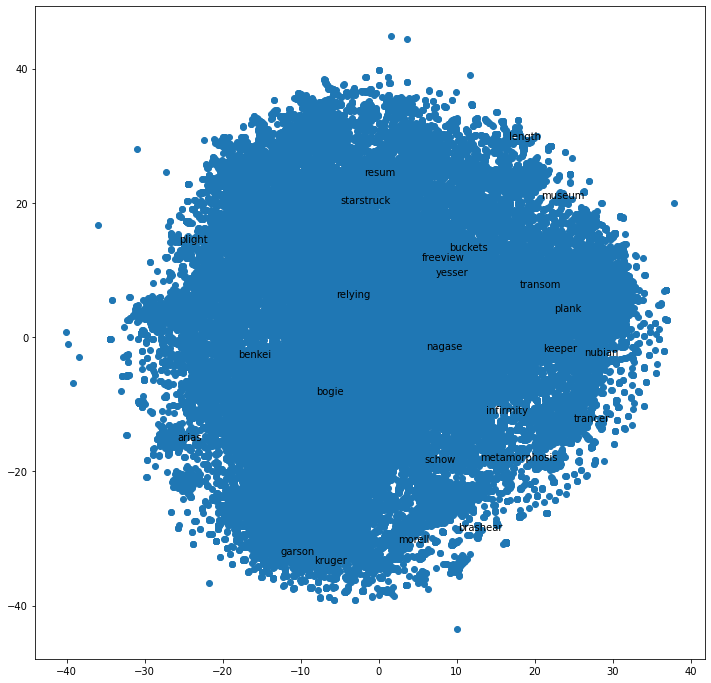

In [38]:
plot_vecs(x_vals, y_vals, labels)

Plotamos todos os vetores, mas o resultado não é muito informativo.

### 10 mais similares vs 10 menos similares

In [39]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
def tsnescatterplot(model, word, list_names):

    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gera lista com as palavras mais similares 
    close_words = model.wv.most_similar([word])
    
    # adiciona os vetores para cada palavra mais próxima no array 
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adiciona os vetores para cada palavra em list_names no array 
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduz a dimensionalidade de 100 para 10 com PCA
    reduc = PCA(n_components=10).fit_transform(arrays)
    
    # Acha as coordenadas do t-SNE para 2 dimensões 
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Arruma tudo para o plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Plot básico
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']})
    
    # Adiciona anotações
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal').set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

In [45]:
sns.set_style("darkgrid")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


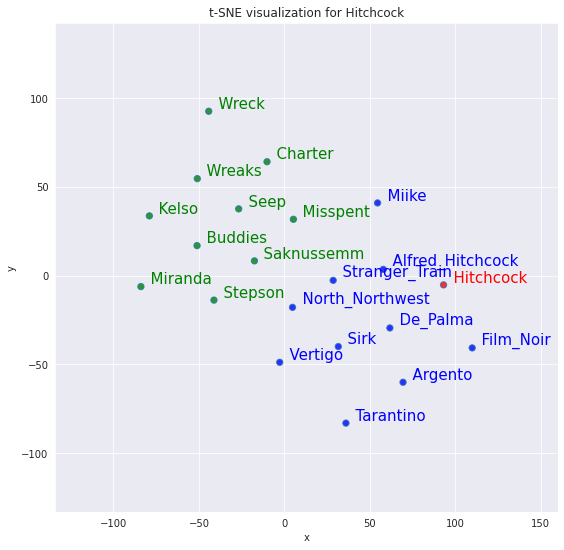

In [46]:
tsnescatterplot(w2v_model, 'hitchcock', [v[0] for v in w2v_model.wv.most_similar(negative=["hitchcock"])])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


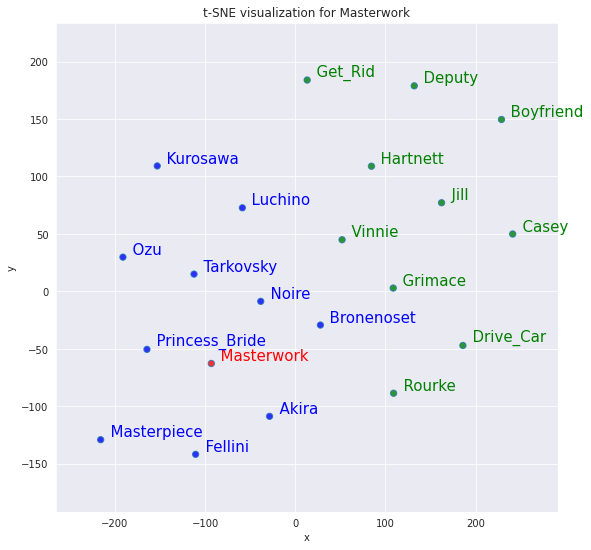

In [47]:
tsnescatterplot(w2v_model, 'masterwork', [v[0] for v in w2v_model.wv.most_similar(negative=["masterwork"])])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


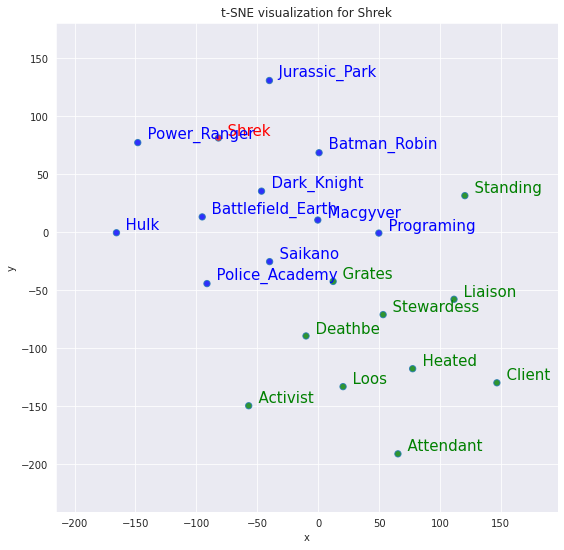

In [48]:
tsnescatterplot(w2v_model, 'shrek', [v[0] for v in w2v_model.wv.most_similar(negative=["shrek"])])

## Considerações finais
Os modelos não estão perfeitos, ainda há muito a ser melhorado, mas esse foi um projetinho bem legal como introdução à área. Aprendi bastante e saio daqui com uma noção melhor do workflow de um projeto de NLP e de algumas ferramentas. Os próximos passos são me aprofundar mais para dominar e aplicar melhor essas técnicas, bem como estudar coisas novas em NLP nesse semestre.